In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("students_adaptability_level_online_education.csv")

In [3]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [4]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [5]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [6]:
#dropna(axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [8]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [9]:
df.Gender.value_counts()

Boy     663
Girl    542
Name: Gender, dtype: int64

In [10]:
df['Adaptivity Level'].value_counts(normalize=True)

Moderate    0.518672
Low         0.398340
High        0.082988
Name: Adaptivity Level, dtype: float64

In [11]:
df.Device.value_counts(normalize=True)

Mobile      0.840664
Computer    0.134440
Tab         0.024896
Name: Device, dtype: float64

In [12]:
df.groupby(['Education Level', 'Financial Condition'])['Age'].count().unstack()

Financial Condition,Mid,Poor,Rich
Education Level,,,
College,200,17,2
School,336,143,51
University,342,82,32


In [13]:
test1 = df.groupby(['Education Level', 'Financial Condition'])['Age'].count().unstack()

In [14]:
from scipy import stats
_, p_val, _, _ = stats.chi2_contingency(test1)

if p_val < 0.05 :
    print('We can reject the null hypotesis')
else:
    print('We failed to reject the null hypotesis')

We can reject the null hypotesis


In [15]:
test2 = df.groupby(['Gender', 'Education Level'])['Age'].count().unstack()

In [16]:
_, p_val = stats.power_divergence(test2)

p_val.round(5)

array([0.00366, 0.60219, 0.     ])

In [17]:
test2 = df.groupby(['Device', 'Financial Condition'])['Age'].count().unstack()

_, p_val, _, _ = stats.chi2_contingency(test2)

if p_val < 0.05 :
    print('We can reject the null hypotesis')
else:
    print('We failed to reject the null hypotesis')

We can reject the null hypotesis


In [18]:
for i in df.columns.tolist() :
    test = df.groupby([i, 'Adaptivity Level'])['Age'].count().unstack()
    _, p_val, _, _ = stats.chi2_contingency(test)
    if p_val.round(5) <=0.5:
        print(i, '- Adaptivity Level p-value:', p_val )

Gender - Adaptivity Level p-value: 0.0011997056689743298
Education Level - Adaptivity Level p-value: 8.088376597327654e-08
Institution Type - Adaptivity Level p-value: 5.516916084156889e-24
IT Student - Adaptivity Level p-value: 5.553333138404098e-05
Location - Adaptivity Level p-value: 1.3386485938039274e-18
Load-shedding - Adaptivity Level p-value: 0.006832617382812384
Financial Condition - Adaptivity Level p-value: 4.391228197442381e-50
Internet Type - Adaptivity Level p-value: 2.7048827686608964e-05
Self Lms - Adaptivity Level p-value: 3.8588766460420006e-07
Device - Adaptivity Level p-value: 1.0744813411621724e-10


In [19]:
df.groupby(['Gender', 'Age', 'Adaptivity Level'])['Age'].count().unstack()

Adaptivity Level  High    Low  Moderate
Gender Age                             
Boy    1-5         NaN   14.0       NaN
       11-15      23.0   74.0     114.0
       16-20       NaN   40.0      69.0
       21-25      32.0   94.0     139.0
       26-30      12.0   10.0      20.0
       6-10        4.0   13.0       5.0
Girl   1-5         NaN    3.0      64.0
       11-15       5.0   46.0      91.0
       16-20       5.0  104.0      60.0
       21-25       6.0   45.0      58.0
       26-30       NaN   26.0       NaN
       6-10       13.0   11.0       5.0

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as cv
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler 

In [31]:
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

In [32]:
rus = RandomOverSampler(random_state=10)
X_rus, y_rus = rus.fit_resample(X, y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, stratify=y_rus, test_size= 0.3, random_state=0)

In [34]:
print('X_train shape:''\n' 'Rows:', X_train.shape[0],'\n' 'Columns:', X_train.shape[1])

X_train shape:
Rows: 1312 
Columns: 13


In [35]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [36]:
ohe = OneHotEncoder(drop='first', sparse=False)
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [40]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [42]:
y_pred = logreg.predict(X_test)

In [43]:
y_test

array([0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1,
       2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2,
       2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1,

In [44]:
y_pred

array([0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2,
       1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2,
       0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0,
       2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1,

In [45]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       193
           1       0.76      0.76      0.76       188
           2       0.63      0.65      0.64       182

    accuracy                           0.74       563
   macro avg       0.74      0.74      0.74       563
weighted avg       0.74      0.74      0.74       563



In [51]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[155,   0,  33],
       [ 15, 142,  31],
       [ 23,  46, 118]], dtype=int64)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


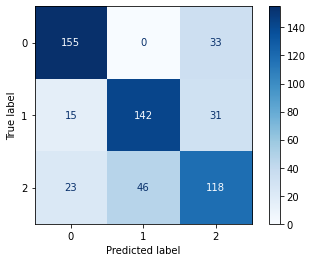

In [65]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,X_test,y_test,cmap='Blues')
plt.grid(False)

In [67]:
from sklearn import metrics

In [69]:
accuracy1=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.5275310834813499
Sensitivity :  1.0
Specificity :  0.9044585987261147


In [70]:
m_rate = (cm[0,1]+cm[1,0])/total
print("Misclassification rate : ", m_rate)

Misclassification rate :  0.02664298401420959
